# 線形モデル
- 実用的に広くつかわれている
- 入力特徴量を線形関数(linear function)を用いて予測を行う


回帰問題で線形モデルによる一般的な予測式は以下の用になる

$$ y^ = w[0] ✕ x[0] + w[1] ✕ x[1] + ・・・ + w[p] ✕ x[p] + b $$

- x[0]からx[p]はある1データポイントの特徴量を示す(この例では特徴量の数はp+1)
- wとbは学習されたモデルのパラメタ

特徴量が一つしかない場合はつぎのようになる

$$ y^ = w[0] ✕ x[0] + b $$

- この式は直線(y=ax+b)を表している
- 別の考え方として予測されるレスポンスは入力特徴量の重み付き和になるとも考えることができる(重みはwで表され負になることもある)


In [2]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler
from sklearn.model_selection import train_test_split
%matplotlib inline

### 一次元のwaveデータセットでw[0]とbを求める

w[0]: 0.393906  b: -0.031804


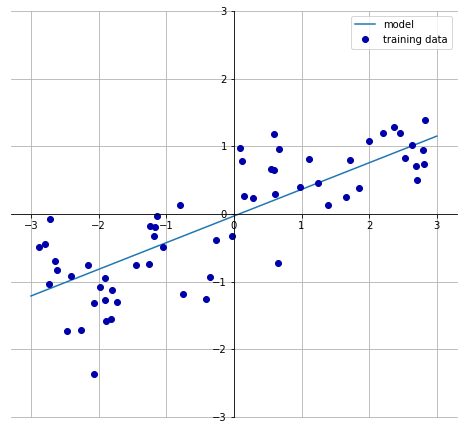

In [3]:
mglearn.plots.plot_linear_regression_wave()

- 回帰における線形モデルは単一の特徴量に対しては予測が直線になる回帰モデルとして特徴付けられる
- 特徴量が2つなら予測は平面に、高次元においては予測は超平面になる

------------

## 線形回帰(通常最小二乗法: ordinary least squares: OLS)
- 最も単純で最も古典的な線形回帰手法
- 線形回帰では訓練データにおいて予測と真の回帰ターゲットyとの`平均2乗誤差`が最小になるようにパラメタwとbを求める
    - 平均二乗誤差は予測と真の値との差を2乗したものの平均値
- 線形回帰にはパラメータがない=モデルの複雑さを制御する方法がない

In [4]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)

lr = LinearRegression().fit(X_train, y_train)

# 傾き(w)は重みもしくは係数(cefficient)と呼ばれ「coef_」属性に格納される
print("lr.coef_: {}".format(lr.coef_))
# 切片(b)は「intercept_」属性に格納される
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 0.39390555]
lr.intercept_: -0.031804343026759746


### !point
- coef_やintercept_のようにscikit-learnでは訓練データから得られた属性には全て最後にアンダースコアをつける慣習になっている
    - これはユーザーが設定したパラメタと明確に区別するため

- intercept_属性は常に単独の浮動小数点数だが、coef_属性は入力特徴量ごとに一つの要素をもつNumPy配列となる

In [5]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


- R2が0.66というのは余り良くないが訓練セットとテストセットに対する値が非常に近い
- これはおそらく適合不足であって、過剰適合ではないことを意味する
- このような一次元データセットではモデルが非常に単純なため過剰適合の危険は少ない

### 高次元のデータセットによる検証

In [6]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


- このように訓練セットとテストセットで性能が大きく異なるのは過剰適合が起きている明らかな兆候
- これを解決するために複雑度を制御できるモデルを探さなくてはいけない

------------

リッジ回帰
--------------------
- 予測に用いられる式は、通常最小二乗法のものと同じ
- 係数(w)を訓練データに対する予測だけでなく、他の成約に対しても最適化する
    - 係数の絶対値の大きさを可能な限り小さくしたい(wの要素をなるべく0に近くしたい)
- この成約条件は正則化(refularization)の一例である
- ※正則化とは過剰適合を防ぐために明示的にモデルを制約すること
    - リッジ回帰で用いられる正則化はL2正則化と呼ばれる

In [8]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


- Ridgeの訓練セットに対するスコアはLinearRegressionの場合よりも低く、テストセットに対するスコアは高い
- 線形回帰ではデータに対して過剰適合していたが、Ridgeは成約の強いモデルなので過剰適合の危険性は少ない
- Ridgeモデルではモデルの簡潔さ(0に近い係数の数)と訓練セットに対する性能がトレードオフの関係になる
    - このどちらかに重きを置くかは、ユーザーがalphaパラメタを用いて指定することができる
    - alphaを増やすと係数はより0に近くなり訓練セットに対する性能は低下するが、汎化性能は上がる
    

### coef_属性からalphaパラメータの影響度を理解する

- alphaパラメータのモデルへの影響を定量的に知るには様々なalphaに対するモデルのcoef_属性を確認するのがよい
- alphaが大きい場合は小さい場合よりも_coef_の要素の絶対値が小さくなることが期待される

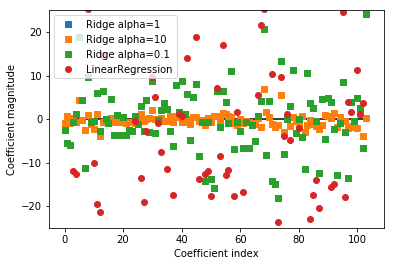

In [46]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, 's', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 's', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

- alphaパラメータのモデルへの影響を定量的に知るには様々なalphaに対するモデルのcoef_属性を確認するのがよい
- alphaが大きい場合は小さい場合よりも_coef_の要素の絶対値が小さくなることが期待される

- 上の図のx軸はcoef_の要素を表している
    - x=0は最初の特徴量に対する係数。x=1は2番目の特徴に対する係数...
    
- y軸は特徴量に対応する係数の数値を表している
    - この図ではalpha=10ではほとんどの係数が-3から3の間にあることがわかる
    - alpha=1ではもう少し広く
    - alpha=0.1では更に広い範囲になっている
    - 正則化されない線形回帰の場合(alpha=0と同じ)更に広くなる
    - つまりalphaが大きくなるほど、値の絶対値は抑制され範囲が小さくなる

### 正則化の影響を理解する
- alpha値を固定して利用できる訓練データの量を変化させることで正則化の影響を理解する

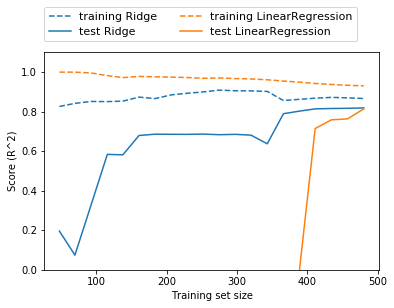

In [22]:
# boston_housingのデータセット
mglearn.plots.plot_ridge_n_samples()

- リッジ回帰でも線形回帰でも訓練スコアは全てのデータサイズにおいてテストスコアよりも高い
- リッジ回帰では正則化が行われているため、訓練スコアは線形回帰のものよりも常に低い
-　ただしテストスコアはリッジ回帰の方がよい
    - データが少ない時は顕著に差がある。(線形回帰は400以下だとほとんど学習できていない)
    - データが多くなるほど両者の差は小さくなり、最後は線形回帰が追いつく
- ここからわかることは「十分な訓練データがある場合には、正則化はあまり意味がない」ということ
    - 線形回帰ではデータ量が多くなると訓練性能がさがっている。これはデータ量がおおくなるとモデルが過剰適合することが難しくなるという事を示している

---------------------------
Lasso
---------------------------
- Ridgeに変わる線形回帰にはLassoがある
- Lassoもリッジ回帰と同様に係数が0になるように成約をかける(正則化する)
    - リッジはL2正則化だったがLassoはL1正則化
- Lassoにおいてはいくつかの係数が完全に0になる
    - これはモデルにおいて幾つかの特徴量が完全に無視されるということを指す
    - 自動的に特徴量を選択していると考えてもよい
    - 幾つかの係数が0になるとモデルを解釈しやすくなり、どの特徴量が重要なのかが明らかになる

In [24]:
# boston_housingのデータセットに適用する
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {:.2f}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4.00


- 訓練セットに対してもテストセットに対しても非常に悪い
- これは適合不足であることを示唆している
- さらに104ある特徴量のうちわずか4つしかつかっていない

---

- Ridgeと同じようにLassoにも係数を0に向かわせる強さを制御する正則化パラメータalphaがある
    - 上記の例ではデフォルトの1.0となっていた
- 適合不足の度合を減らすためには、alphaを減らせばよい
- この際に、max_iter(最大繰り返し回数)もデフォルトから増やしてやる必要がある

In [42]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {:.2f}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33.00


- alphaを小さくすると、より複雑なモデルに適合するようになり、訓練データに対してもテストデータに対しても良い結果が得られている
- 性能はRidgeよりも少しだけ良いくらいだが、104の特徴量のうちわずか33しかつかっていない。これによりモデルは潜在的に理解しやすくなっている

### alphaを小さくしすぎた場合

In [43]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {:.2f}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94.00


- alphaを小さくしすぎるとリッジの場合と同様に正則可の効果が薄れ過剰適合が発生し、性能はLinearRegressionと似たようなものになる

### モデルに対して係数をプロット

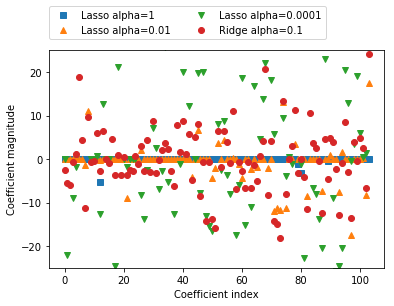

In [51]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

- alpha=1の場合はほとんどの係数が0
- alpha=0.1でもほとんどの特徴量に対する係数は0
- alpha=0.0001で正則化はかなり緩み多くの係数がゼロではなくなる

### まとめ
- 実際に使う場合はリッジをまず試すのがよい
- しかし、特徴量が沢山あってそのうち重要なものはわずかしかないことが予測されるのであればLassoの方が向いている
- 同様に解釈しやすいモデルが欲しいなら重要な特徴量のサブセットを選んでくれるLassoの方が理解しやすいモデルが得られる
- scikit-learnにはLassoとRidgeのペナルティを組み合わせたElasticNetがある。実用上はこの組み合わせが最良の結果をもたらすが、L1正則化パラメタとL2正則化パラメタの２つを調整するコストがかかる

### nextaction
- Lassoを軽く復習